In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns  # opcjonalnie do wizualizacji macierzy pomyłek

In [2]:
train = pd.read_csv('Train.csv', parse_dates=['Date'])
val = pd.read_csv('Validation.csv', parse_dates=['Date'])

In [3]:
features = [
    'HomeTeam_code', 'AwayTeam_code', 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST',
    'HC', 'AC', 'HF', 'AF', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
    'HomeTeam_Form', 'AwayTeam_Form', 'H2H_net', 'Home_ELO', 'Away_ELO'
]


In [4]:
X_train = train[features]
y_train = train['FTR_encoded']

In [5]:
X_val = val[features]
y_val = val['FTR_encoded']

In [6]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [7]:
preds = model.predict(X_val)

Accuracy na zbiorze walidacyjnym: 0.9785177228786252

Macierz pomyłek:
[[326   3   0]
 [  7 205   2]
 [  0   8 380]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       329
           1       0.95      0.96      0.95       214
           2       0.99      0.98      0.99       388

    accuracy                           0.98       931
   macro avg       0.97      0.98      0.98       931
weighted avg       0.98      0.98      0.98       931



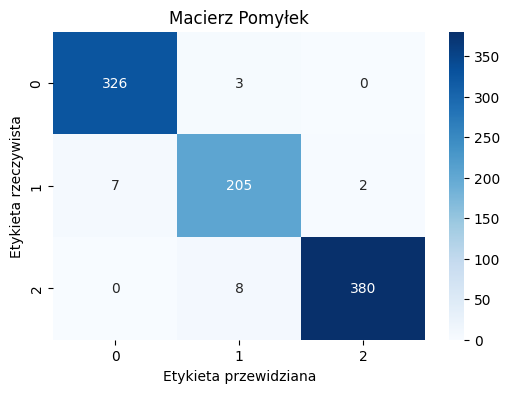

In [ ]:
accuracy = accuracy_score(y_val, preds)
print("Accuracy na zbiorze walidacyjnym:", accuracy)

print("\nMacierz pomyłek:")
cm = confusion_matrix(y_val, preds)
print(cm)

print("\nRaport klasyfikacji:")
print(classification_report(y_val, preds))

#Wizualizacja macierzy pomyłek
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Macierz Pomyłek")
plt.ylabel("Etykieta rzeczywista")
plt.xlabel("Etykieta przewidziana")
plt.show()

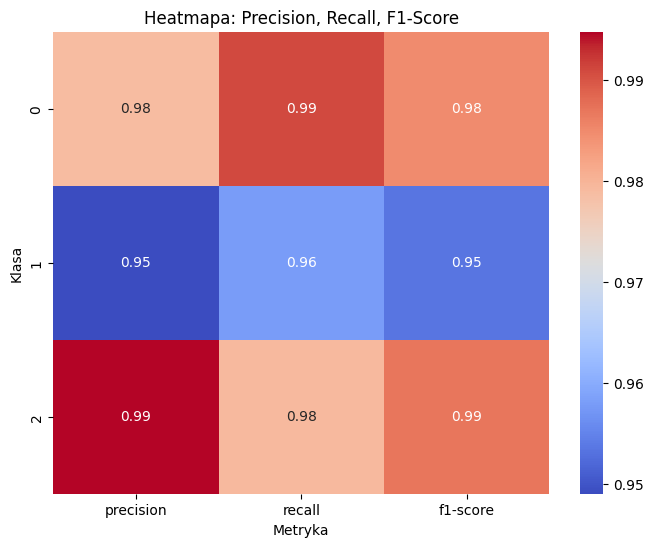

In [9]:
report_dict = classification_report(y_val, preds, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

# Załóżmy, że nasze klasy są oznaczone jako '0', '1', '2'
# Wybieramy tylko metryki: precision, recall i f1-score dla poszczególnych klas
df_metrics = df_report.loc[['0', '1', '2'], ['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 6))
sns.heatmap(df_metrics, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmapa: Precision, Recall, F1-Score")
plt.ylabel("Klasa")
plt.xlabel("Metryka")
plt.show()

Najlepsze parametry dla LR: {'C': 0.01}
Najlepsza CV Accuracy dla LR: 0.5401013067722301
Validation Accuracy (LR): 0.5381310418904404
Confusion Matrix:
[[167   0 162]
 [ 64   0 150]
 [ 54   0 334]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.54       329
           1       0.00      0.00      0.00       214
           2       0.52      0.86      0.65       388

    accuracy                           0.54       931
   macro avg       0.37      0.46      0.40       931
weighted avg       0.42      0.54      0.46       931



C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarni

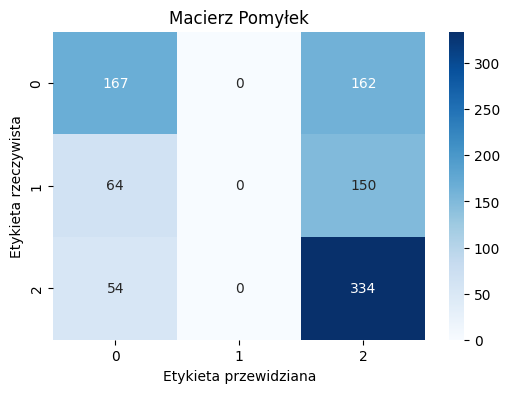

C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

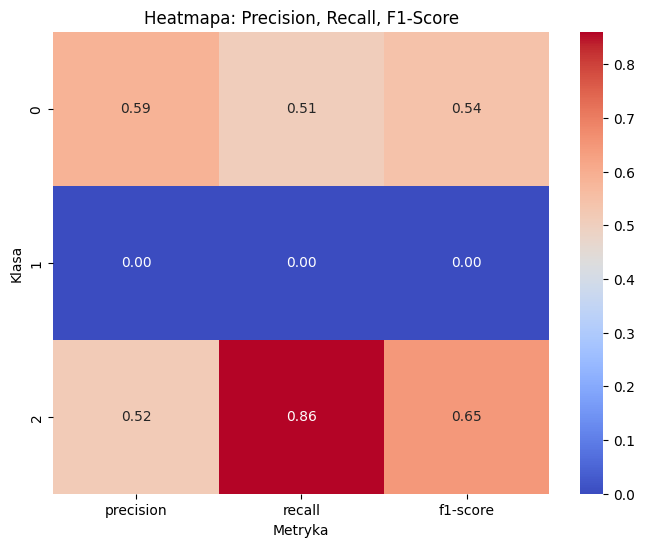

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wczytanie zbiorów danych
train = pd.read_csv('Train.csv', parse_dates=['Date'])
val = pd.read_csv('Validation.csv', parse_dates=['Date'])

# 2. Przygotowanie cech i etykiety
# Używamy tylko cech dostępnych przed meczem
features = [
    'B365H', 'B365D', 'B365A', 
    'BWH', 'BWD', 'BWA',
    'HomeTeam_Form', 'AwayTeam_Form',
    'H2H_net',
    'Home_ELO', 'Away_ELO'
]

X_train = train[features]
y_train = train['FTR_encoded']

X_val = val[features]
y_val = val['FTR_encoded']

# 3. Preprocessing – skalowanie cech
# Skalowanie jest szczególnie istotne dla regresji logistycznej
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Optymalizacja hiperparametru regresji logistycznej (Grid Search dla parametru C)
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Najlepsze parametry dla LR:", grid.best_params_)
print("Najlepsza CV Accuracy dla LR:", grid.best_score_)

# 5. Ocena modelu na zbiorze walidacyjnym
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_val_scaled)
acc = accuracy_score(y_val, y_pred)
print("Validation Accuracy (LR):", acc)

# Wyświetlenie macierzy pomyłek oraz raportu klasyfikacji
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_val, y_pred))

# 6. Wizualizacje wyników
# 6.1. Heatmapa macierzy pomyłek
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Macierz Pomyłek")
plt.ylabel("Etykieta rzeczywista")
plt.xlabel("Etykieta przewidziana")
plt.show()

# 6.2. Heatmapa precision, recall i f1-score
# Generujemy raport klasyfikacji w postaci słownika, a następnie DataFrame
report_dict = classification_report(y_val, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

# Zakładamy, że klasy to '0', '1', '2' (np. H, D, A)
df_metrics = df_report.loc[['0', '1', '2'], ['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 6))
sns.heatmap(df_metrics, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmapa: Precision, Recall, F1-Score")
plt.ylabel("Klasa")
plt.xlabel("Metryka")
plt.show()
